# Cats in the Wild Image Classification Project
# ADA447 Midterm Project



In [ ]:
# Installing necessary library(fastai)
!pip install -q fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/664.8 MB 235.4 MB/s eta 0:00:03
ERROR: Operation cancelled by user


In [ ]:
# Importing libraries
from fastai.vision.all import *


In [ ]:
# Getting data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## A. General Steps

### A.1. Download the data
 10 Big Cats of the Wild - Image Classification is selected as data for this project.

 link for the data: https://www.kaggle.com/datasets/gpiosenka/cats-in-the-wild-image-classification

 NOTE: Note that i moved 35 images from each train category to validation folder to increase validation set size.

In [ ]:
# Path to dataset in Google drive
data_path = '/content/drive/MyDrive/ada447'
train_path = data_path + '/train'
test_path = data_path + '/test'
valid_path = data_path + '/valid'

print(f"Train path exists: {os.path.exists(train_path)}")
print(f"Test path exists: {os.path.exists(test_path)}")
print(f"Valid path exists: {os.path.exists(valid_path)}")

Train path exists: True
Test path exists: True
Valid path exists: True


### A.1.1 Inspect the data layout

In [ ]:
# Function to explore dataset structure
def explore_dataset(path):
  categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
  print(f"Found {len(categories)} categories: {categories}")

  # Inspect details for first 3 categories
  for cat in categories[:3]:
    cat_path = os.path.join(path, cat)
    images = [f for f in os.listdir(cat_path) if f.lower().endswith(('png', 'jpg','jpeg'))] # To be sure about file extensions
    print(f" - {cat}: {len(images)} images.")
    if images:
      print(f"  Sample image: {images[0]}")

In [ ]:
print("\nExploring training dataset:")
explore_dataset(train_path)

print("\nExploring validation dataset:")
explore_dataset(valid_path)

print("\nExploring testing dataset:")
explore_dataset(test_path)


Exploring training dataset:
Found 10 categories: ['CARACAL', 'TIGER', 'CHEETAH', 'SNOW LEOPARD', 'PUMA', 'OCELOT', 'LIONS', 'JAGUAR', 'CLOUDED LEOPARD', 'AFRICAN LEOPARD']
 - CARACAL: 201 images.
  Sample image: 102.jpg
 - TIGER: 202 images.
  Sample image: 050.jpg
 - CHEETAH: 200 images.
  Sample image: 119.jpg

Exploring validation dataset:
Found 10 categories: ['CARACAL', 'TIGER', 'LIONS', 'SNOW LEOPARD', 'CHEETAH', 'PUMA', 'JAGUAR', 'OCELOT', 'AFRICAN LEOPARD', 'CLOUDED LEOPARD']
 - CARACAL: 40 images.
  Sample image: 218.jpg
 - TIGER: 40 images.
  Sample image: 227.jpg
 - LIONS: 40 images.
  Sample image: 208.jpg

Exploring testing dataset:
Found 10 categories: ['SNOW LEOPARD', 'LIONS', 'OCELOT', 'TIGER', 'PUMA', 'CARACAL', 'JAGUAR', 'CHEETAH', 'AFRICAN LEOPARD', 'CLOUDED LEOPARD']
 - SNOW LEOPARD: 5 images.
  Sample image: 2.jpg
 - LIONS: 5 images.
  Sample image: 3.jpg
 - OCELOT: 5 images.
  Sample image: 2.jpg


In [ ]:
# Display some sample images
def show_sample_images(path, n=3):
  categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
  plt.figure(figsize=(15, 5))

  for i, cat in enumerate(categories[:n]):
    cat_path = os.path.join(path, cat)
    images = [f for f in os.listdir(cat_path) if f.lower().endswith(('png', 'jpg','jpeg'))]
    if images:
      img_path = os.path.join(cat_path, images[0])
      img = plt.imread(img_path)
      plt.subplot(1, n, i+1)
      plt.imshow(img)
      plt.title(f"{cat}\n{img.shape}")
      plt.axis('off')

    plt.tight_layout()
    plt.show()


 Sample images from training set:


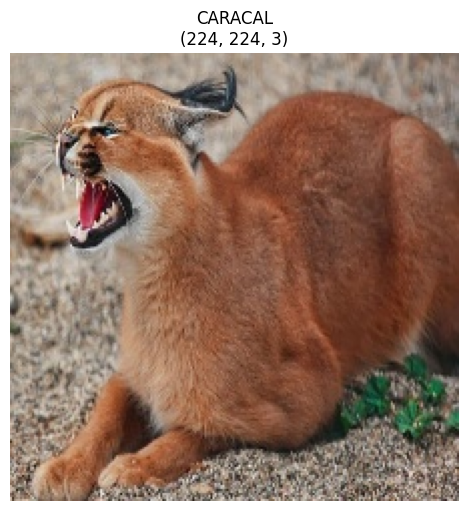

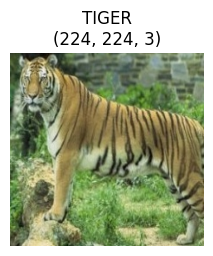

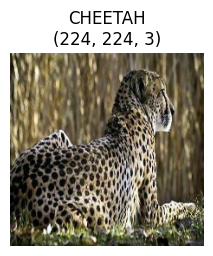


 Sample images from validation set:


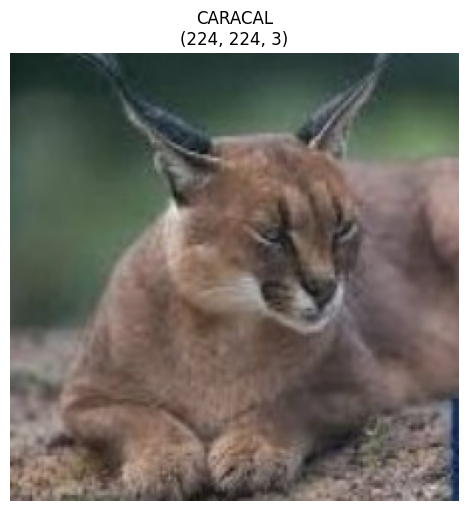

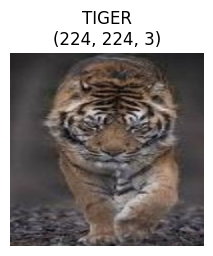

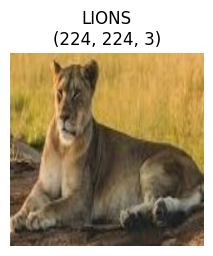


 Sample images from testing set:


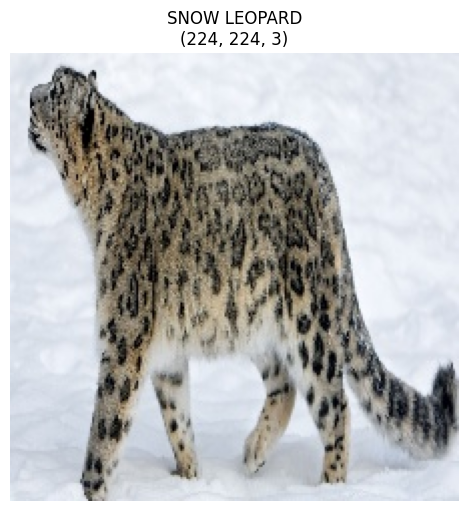

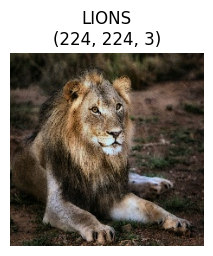

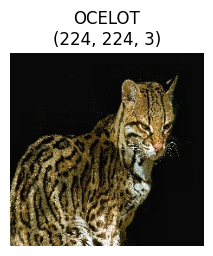

In [ ]:
print("\n Sample images from training set:")
show_sample_images(train_path)

print("\n Sample images from validation set:")
show_sample_images(valid_path)

print("\n Sample images from testing set:")
show_sample_images(test_path)

### A.1.2. Decide how to create the datablock

#### Based on our inspection, we'll create a DataBlock with:
 - CategoryBlock for the labels (cat species)
 - ImageBlock for the images
 - Using Parent folder name as the label
 - Splitting by using the valid folder
 - Applying standard transforms


### A.2. Create the DataBlock and dataloaders

### A.2.1 Define the blocks
### A.2.2 Define the means of getting data into DataBlock
### A.2.3 Define how to get the attributes
### A.2.4 Define data transformations



In [ ]:
def wildcats_block(bs=64, size=224):
  cats = DataBlock(
      blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      splitter=GrandparentSplitter
      (train_name='train', valid_name='valid'),
      get_y=parent_label,
      item_tfms=[Resize(size*2)], # Presizing
      batch_tfms=[*aug_transforms(size=size),
                  Normalize.from_stats(*imagenet_stats)]
  )
  return cats.dataloaders(data_path, bs=bs)

In [ ]:
dls = wildcats_block(bs=32)

### A.3. Inspect the DataBlock via dataloader

### A.3.1 Show batch

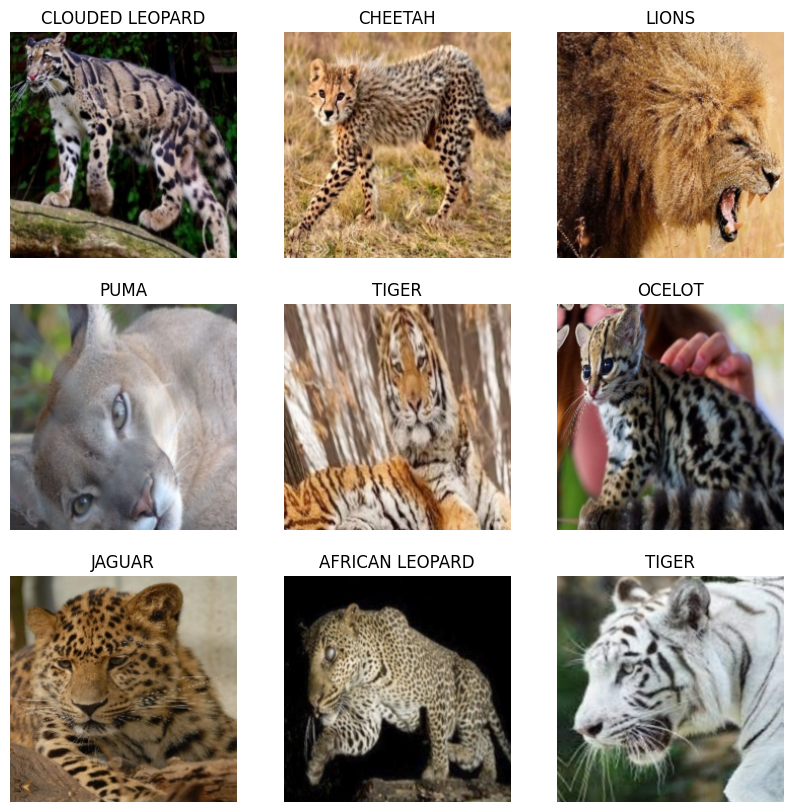

In [ ]:
dls.show_batch(max_n=9, figsize=(10, 10))

### A.3.2 Check the labes

In [ ]:
print(f"Classes: {dls.vocab}")

Classes: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']


### A.3.3 Summarize the DataBlock

In [ ]:
def inspect_dataloaders(dls):
    # Check basic dataset statistics
    print("=== DataLoaders Inspection ===")
    print(f"Training set size: {len(dls.train_ds)} images")
    print(f"Validation set size: {len(dls.valid_ds)} images")
    print(f"Number of classes: {len(dls.vocab)}")
    print(f"Class labels: {dls.vocab}\n")

    # Check input shape from first batch
    xb, yb = dls.one_batch()
    print(f"Input shape (batch x channels x height x width): {xb.shape}")
    print(f"Label shape: {yb.shape}\n")

    # Verify transformations
    print("Item transforms applied:")
    for tfm in dls.train.tfms: print(f"  - {str(tfm)}")

    print("\nBatch transforms applied:")
    for tfm in dls.train.after_batch: print(f"  - {str(tfm)}")


In [ ]:
print("DataBlock Summary:")
inspect_dataloaders(dls)

DataBlock Summary:
=== DataLoaders Inspection ===
Training set size: 1989 images
Validation set size: 400 images
Number of classes: 10
Class labels: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']

Input shape (batch x channels x height x width): torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])

Item transforms applied:
  - Pipeline: PILBase.create
  - Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Batch transforms applied:
  - IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}:
encodes: (TensorImage,object) -> encodes
(TensorMask,object) -> encodes
decodes: (TensorImage,object) -> decodes

  - Flip -- {'size': 224, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5}:
encodes: (TensorImage,object) -> encodes
(TensorMask,object) -> encodes
(TensorBBox,object) -> encodes
(TensorPoint,object) -> encodes
decodes: 
 

### A.4. Train a simple model

### A.4.1 Create a benchmark

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
print("Traning a benchmark model")
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 228MB/s]


Traning a benchmark model


In [ ]:
# Save the model
model_path = Path("/content/drive/MyDrive/ada447/models")
model_path.mkdir(exist_ok=True)  # Create folder if it doesn't exist

learn.export(fname=model_path/'01_wildcat_classifier.pkl')
print("Model exported successfully!")

# Verify export
!ls -lh "{model_path}/01_wildcat_classifier.pkl"

Model exported successfully!
-rw------- 1 root root 84M May 19 10:28 /content/drive/MyDrive/ada447/models/01_wildcat_classifier.pkl



### A.4.2 Interpret the model
### A.4.3 Confusion matrix

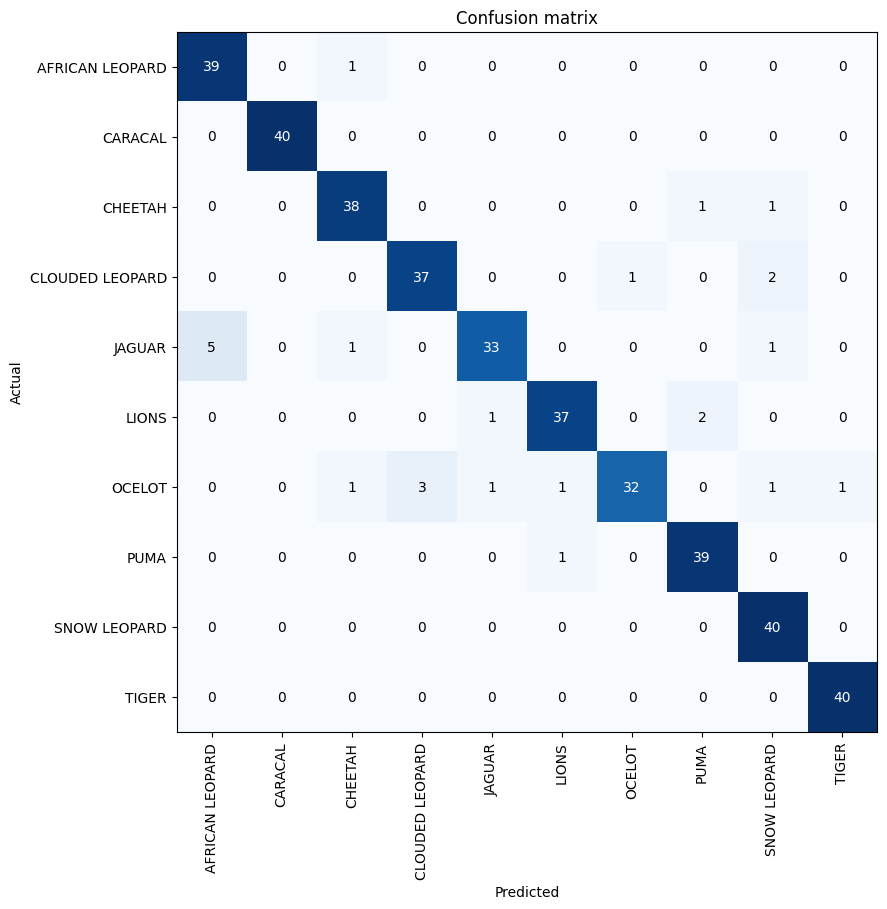

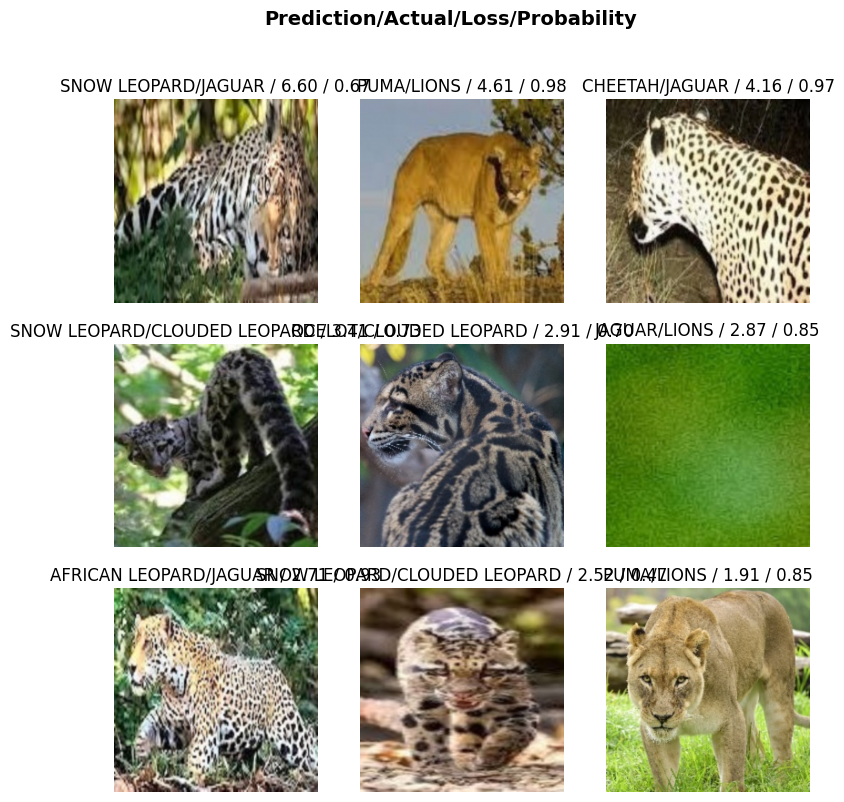

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(9, 9))
interp.plot_top_losses(9, figsize=(9,9))

## B. Advanced Techniques:
### B.1.Learning Rate Finder



Finding optimal learning rate


Minimum: 3.6307807022240014e-06, Steepest: 9.12010818865383e-07


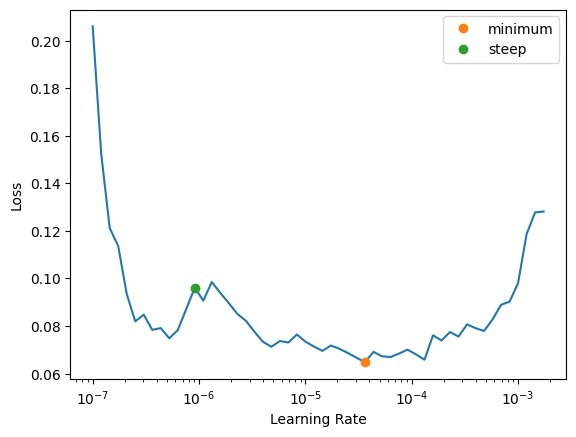

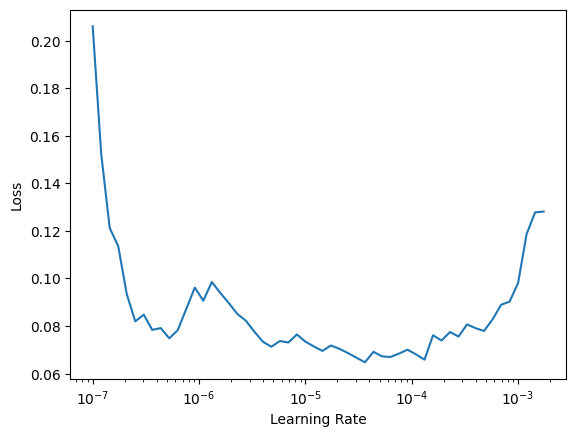

In [ ]:
print("\nFinding optimal learning rate")
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
learn.recorder.plot_lr_find()
print(f"Minimum: {lr_min}, Steepest: {lr_steep}")

### B.2: Learning Rate Finder Algorithm

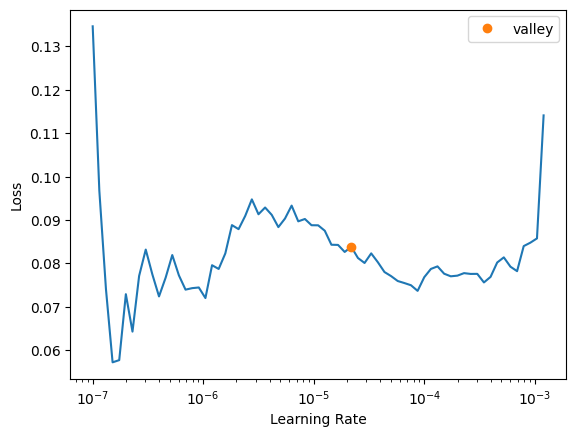

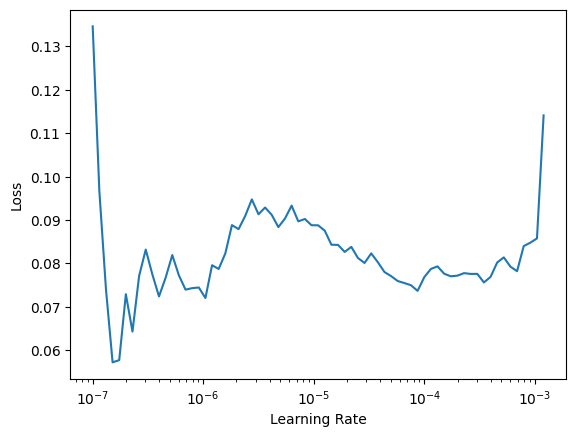

In [ ]:
lr_rec = learn.lr_find(start_lr=1e-7, end_lr=1e-1, num_it=100)  # B.2.1-B.2.5
learn.recorder.plot_lr_find()

### B.3. Transfer Learning with unfreezing
### B.4. Discriminative Learning Rates


In [ ]:
# Freeze pretrained layers, train head first
learn.freeze()
learn.fit_one_cycle(3, lr_max=1e-4)  # Start with 1e-4 (steepest region)

In [ ]:
# save the model
learn.export(fname=model_path/'02_wildcat_classifier.pkl')
print("Model exported successfully!")

# Verify export
!ls -lh "{model_path}/02_wildcat_classifier.pkl"

Model exported successfully!
-rw------- 1 root root 84M May 18 10:43 /content/drive/MyDrive/ada447/models/02_wildcat_classifier.pkl


In [ ]:
# Unfreeze and train full model with discriminative LRs
learn.unfreeze()
learn.fit_one_cycle(
    5,
    lr_max=slice(1e-6, 1e-4)  # B.4.7: Early layers (1e-6), later layers (1e-4)
)

In [ ]:
# save the model
learn.export(fname=model_path/'03_wildcat_classifier.pkl')
print("Model exported successfully!")

# Verify export
!ls -lh "{model_path}/03_wildcat_classifier.pkl"

Model exported successfully!
-rw------- 1 root root 84M May 18 10:44 /content/drive/MyDrive/ada447/models/03_wildcat_classifier.pkl


### B.5: Deciding Number of Epochs

B.5.1-B.5.3 Justification:
We use 4 epochs because:
1. The LR finder curve shows valid LR range
2. Training might end too soon if it were stopped too soon. (B.5.2)
3. 4 epochs allow:
   - Initial convergence with frozen weights (first 1-2 epochs)
   - Fine-tuning with discriminative LRs (last 2 epochs)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

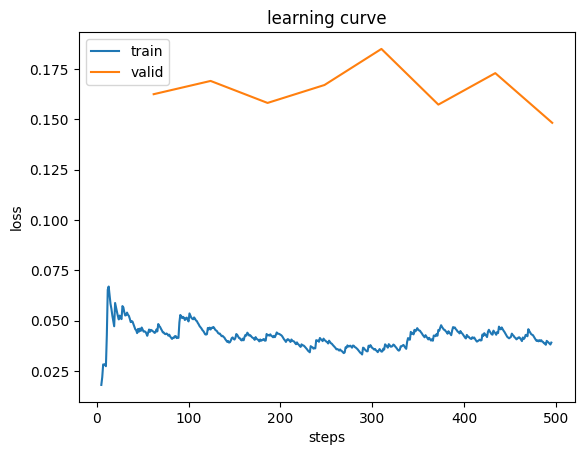

In [ ]:
# Continue fine-tuning using the optimal LR slice
# Replace `n_epochs` with a reasonable value
learn.fit_one_cycle(8, lr_max=slice(lr_min/10, lr_steep))

# Inspect the training and validation loss curves
learn.recorder.plot_loss()

In [ ]:
# save the model
learn.export(fname=model_path/'04_wildcat_classifier.pkl')
print("Model exported successfully!")

# Verify export
!ls -lh "{model_path}/04_wildcat_classifier.pkl"

Model exported successfully!
-rw------- 1 root root 84M May 18 10:45 /content/drive/MyDrive/ada447/models/04_wildcat_classifier.pkl


### B.6: Model Capacity Adjustments
#### Training ResNet50 with reduced batch size (16)

In [ ]:
print("\nB.6: Training ResNet50 with reduced batch size (10)")
large_dls = wildcats_block(bs=10)  # Create DataLoaders with batch_size=10
learn_large = vision_learner(large_dls, resnet50, metrics=accuracy)


B.6: Training ResNet50 with reduced batch size (10)


In [ ]:
# Enable mixed precision training
learn_large.to_fp16()

In [ ]:
# Train the model
learn_large.fine_tune(4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


In [ ]:
#save model
learn_large.export(fname=model_path/'05_wildcat_classifier.pkl')
print("Model exported successfully!")

# Verify export
!ls -lh "{model_path}/05_wildcat_classifier.pkl"

Model exported successfully!
-rw------- 1 root root 99M May 18 10:46 /content/drive/MyDrive/ada447/models/05_wildcat_classifier.pkl


### Huggingface Connection



In [ ]:
!pip install huggingface_hub
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import HfApi, Repository

SPACE_NAME = "ataberkkilavuzcu/wildcats-classifier-gradio"
api = HfApi()
api.create_repo(repo_id=SPACE_NAME, repo_type="space", space_sdk="gradio", exist_ok=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RepoUrl('https://huggingface.co/spaces/ataberkkilavuzcu/wildcats-classifier-gradio', endpoint='https://huggingface.co', repo_type='space', repo_id='ataberkkilavuzcu/wildcats-classifier-gradio')